<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Техническое-задание" data-toc-modified-id="Техническое-задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Техническое задание</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Задание-1" data-toc-modified-id="Задание-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Задание 1</a></span></li><li><span><a href="#Задание-2" data-toc-modified-id="Задание-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Задание 2</a></span></li><li><span><a href="#Задание-3" data-toc-modified-id="Задание-3-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Задание 3</a></span></li><li><span><a href="#Задание-4" data-toc-modified-id="Задание-4-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Задание 4</a></span></li></ul></li></ul></div>

# Тестовое задание для компании в сфере Fintech

## Техническое задание

1) Необходимо рассчитать число активных займов в портфелях инвесторов. В качестве ответа нужно предоставить разницу по модулю этих значений между инвесторами с id = 1 и id = 3.

2) Необходимо рассчитать, какую долю от общей суммы каждого займа составляет инвестиция каждого конкретного инвестора.
Среди рассчитанных значений  получить среднее значение по всем займам, а также максимальное значение для займа с id = 3.
 
В качестве ответа предоставить разницу по модулю двух полученных выше значений (среднего из всех и максимального по займу с id = 3), умножить на 10 000 и взять от полученного числа целую часть.

3) Фактические суммы дохода / потерь инвестора рассчитываются следующим образом: в качестве дохода берётся сумма процентных платежей, а в качестве потерь — неоплаченный остаток долга в случае, если произошёл дефолт. Относительное значение можно получить путём деления рассчитанной суммы на общую сумму инвестированных в займы средств инвестора. В настоящем задании необходимо рассчитать относительное значение дохода (или потерь) инвесторов на конец дня 01.03.2023 по каждому.
Для корректности расчёта стоит обратить внимание на указанную дату, так как часть дефолтов ещё не реализовалась к указанной дате, денежные средства инвесторов ещё не были проинвестированы в займы, выданные после этой даты, а процентный доход после указанной даты не был получен.
 

В качестве ответа необходимо указать разницу по модулю между максимальным и минимальным значениями относительной доходности среди инвесторов на указанную дату, умножить на 10 000 и использовать для ответа целую часть полученного числа.

4) Необходимо рассчитать помесячный относительный доход инвесторов аналогично методике, описанной в предыдущем задании с даты начала их инвестирования по конец наблюдений 01.02.2024, построить график, объединяющий доходности разных инвесторов и провести анализ указанных результатов.

## Описание данных

Таблица investor cashflow представляет из себя датасет операций: инвестирование средств в займ и последующие выплаты процентов заёмщиком в пользу инвестора. История инвестирования начинается с инвестиции суммы в займ (отрицательное значение amount) и заканчивается последней совершённой выплатой согласно графику платежей (положительные значения amount). Все займы имеют аннуитетную структуру платежей.


investor cashflow

**Описание полей:**  
investor_id — идентификатор инвестора  
date — дата операции  
loan_id — идентификатор займа  
amount — сумма займа  
principal_payment — часть платежа в погашение основного долга  
interest_payment — часть платежа в погашение процентов  
 

Loan table — таблица с условиями по займам и их статус на момент окончания наблюдений (01.02.2024). 

**Описание полей:**   
loan_id — идентификатор займа  
loan_rate — годовая процентная ставка по займу  
amount — общая сумма займа  
term — срок займа (дней)  
status — статус займа на момент окончания наблюдений: active — активен, closed — завершён, default — дефолт  
start_date — дата выдачи займа  
date_of_default — дата дефолта, если такое событие произошло  

## Анализ данных

Загружаем основные библиотеки для работы с данными.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Откроем датасет с помощью команды pd.read_excel.

In [2]:
investor_cashflow = pd.read_excel('C:/Users/truel/datasets/investor_cashflow.xlsx')

Теперь с помощью команды info посмотрим на основные особенности датасета.

In [3]:
investor_cashflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21093 entries, 0 to 21092
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   investor_id        21093 non-null  int64         
 1   date               21093 non-null  datetime64[ns]
 2   loan_id            21093 non-null  int64         
 3   amount             21093 non-null  float64       
 4   principal_payment  21093 non-null  float64       
 5   interest_payment   21093 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 988.9 KB


Количество строк 21093. Пропущенных значений не обнаруженно. Формат данных - int64, datetime64[ns], float64. 

Проделаем аналогичные манипуляции для датасета loan_table.

In [4]:
loan_table = pd.read_excel('C:/Users/truel/datasets/loan_table.xlsx')

In [5]:
loan_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   loan_id          1000 non-null   int64         
 1   loan_rate        1000 non-null   float64       
 2   amount           1000 non-null   int64         
 3   term             1000 non-null   int64         
 4   status           1000 non-null   object        
 5   start_date       1000 non-null   datetime64[ns]
 6   date_of_default  76 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 54.8+ KB


В столбце date_of_default 924 пропущенных значения. Это говорит о том, что для данной операции дефолт не применялся. Следовательно данные пропуски вполне логичны и обоснованы, никакие операции с ними производить ненужно.

Для дальнейшей работы необходимо объединить датасеты. Воспользуемся методом pd.merge и запишем результат объединения в новую переменную df. Общий столбец для объединения loan_id.

In [6]:
df = pd.merge(investor_cashflow, loan_table, on='loan_id', how='left')
df.head()

,investor_id,date,loan_id,amount_x,principal_payment,interest_payment,loan_rate,amount_y,term,status,start_date,date_of_default
0,3,2022-05-01,592,-11000.0,-11000.0,0.0,0.395,1500000,360,closed,2022-05-01,NaT
1,1,2022-05-01,781,-26250.0,-26250.0,0.0,0.395,1500000,180,closed,2022-05-01,NaT
2,3,2022-05-01,781,-11000.0,-11000.0,0.0,0.395,1500000,180,closed,2022-05-01,NaT
3,4,2022-05-01,781,-2500.0,-2500.0,0.0,0.395,1500000,180,closed,2022-05-01,NaT
4,2,2022-05-02,381,-16000.0,-16000.0,0.0,0.206,5000000,360,closed,2022-05-02,NaT


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21093 entries, 0 to 21092
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   investor_id        21093 non-null  int64         
 1   date               21093 non-null  datetime64[ns]
 2   loan_id            21093 non-null  int64         
 3   amount_x           21093 non-null  float64       
 4   principal_payment  21093 non-null  float64       
 5   interest_payment   21093 non-null  float64       
 6   loan_rate          21093 non-null  float64       
 7   amount_y           21093 non-null  int64         
 8   term               21093 non-null  int64         
 9   status             21093 non-null  object        
 10  start_date         21093 non-null  datetime64[ns]
 11  date_of_default    641 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(4), int64(4), object(1)
memory usage: 2.1+ MB


Данные успешно объединены. Строки не были потеряны.

Приступим к изучению ТЗ и проведения исследования.

### Задание 1

**Необходимо рассчитать число активных займов в портфелях инвесторов. В качестве ответа нужно предоставить разницу по модулю этих значений между инвесторами с id = 1 и id = 3.**

Для выполнения данного задания необходимо рассчитать количество активных займов для каждого инвестора. Известно, что статус инвестора записан в столбце status. Следовательно сделаем фильтрацию по статусу, воспользуемся методом groupby и сгруппируем investor_id и loan_id, затем посчитаем количество уникальных значений с помощью метода nunique.

Далее воспользуемся методом get и определим количество активных займов для инвестора с id = 1 и аналогично для инвестора с id = 3.

Для расчета разницы по модулю воспользуемся методом abs.

In [8]:
investor_active_loans = df[df['status'] == 'active'].groupby('investor_id')['loan_id'].nunique()
investor_1 = investor_active_loans.get(1, 0)
investor_3 = investor_active_loans.get(3, 0)

difference = abs(investor_1 - investor_3)

print("Разница по модулю между инвесторами с id = 1 и id = 3:", difference)
print(investor_1)
print(investor_3)

Разница по модулю между инвесторами с id = 1 и id = 3: 29
86
57


In [16]:
df.nunique()

investor_id             5
date                  636
loan_id               941
amount_x               50
principal_payment     368
interest_payment      346
loan_rate               3
amount_y               10
term                    2
status                  3
start_date            335
date_of_default        64
investment_share     1105
dtype: int64

### Задание 2

**Необходимо рассчитать, какую долю от общей суммы каждого займа составляет инвестиция каждого конкретного инвестора.
Среди рассчитанных значений  получить среднее значение по всем займам, а также максимальное значение для займа с id = 3.  
В качестве ответа предоставить разницу по модулю двух полученных выше значений (среднего из всех и максимального по займу с id = 3), умножить на 10 000 и взять от полученного числа целую часть.**

Для выполнения данного задания необходимо рассчитать сумму значения в столбце amount_x для каждого займа, затем рассчитать долю от общей суммы для каждого инвестора. Для этого нам необходимо использовать методы groupby и transform('sum').

Затем необходимо рассчитать среднее значения с помощью метода mean.

Далее посчитаем максимальное значение для займа с id =3. Для этого используем фильтрацию и метод max.

После этого считаем разницу по модулю между средним и максимальным значением.

Остается умножить результат на 10000 и взять от полученного числа целую часть с помощью метода int.

In [10]:
df['investment_share'] = df['amount_x'] / df.groupby('loan_id')['amount_x'].transform('sum')

avg_inv = df['investment_share'].mean()

max_inv_id_3 = df[df['loan_id'] == 3]['investment_share'].max()

difference = abs(avg_inv - max_inv_id_3)

result = int(difference * 10000)

print("Разница по модулю умноженная на 10 000:", result)

Разница по модулю умноженная на 10 000: 4748


In [11]:
df.head()

,investor_id,date,loan_id,amount_x,principal_payment,interest_payment,loan_rate,amount_y,term,status,start_date,date_of_default,investment_share
0,3,2022-05-01,592,-11000.0,-11000.0,0.0,0.395,1500000,360,closed,2022-05-01,NaT,-4.412477
1,1,2022-05-01,781,-26250.0,-26250.0,0.0,0.395,1500000,180,closed,2022-05-01,NaT,-5.581488
2,3,2022-05-01,781,-11000.0,-11000.0,0.0,0.395,1500000,180,closed,2022-05-01,NaT,-2.338909
3,4,2022-05-01,781,-2500.0,-2500.0,0.0,0.395,1500000,180,closed,2022-05-01,NaT,-0.531570
4,2,2022-05-02,381,-16000.0,-16000.0,0.0,0.206,5000000,360,closed,2022-05-02,NaT,-3.160328


### Задание 3

**Фактические суммы дохода / потерь инвестора рассчитываются следующим образом: в качестве дохода берётся сумма процентных платежей, а в качестве потерь — неоплаченный остаток долга в случае, если произошёл дефолт. Относительное значение можно получить путём деления рассчитанной суммы на общую сумму инвестированных в займы средств инвестора. В настоящем задании необходимо рассчитать относительное значение дохода (или потерь) инвесторов на конец дня 01.03.2023 по каждому.
Для корректности расчёта стоит обратить внимание на указанную дату, так как часть дефолтов ещё не реализовалась к указанной дате, денежные средства инвесторов ещё не были проинвестированы в займы, выданные после этой даты, а процентный доход после указанной даты не был получен. В качестве ответа необходимо указать разницу по модулю между максимальным и минимальным значениями относительной доходности среди инвесторов на указанную дату, умножить на 10 000 и использовать для ответа целую часть полученного числа.**

Для выполнения данного задания, необходимо выполнить фильтрацию по дате до 2023-03-01 включительно. Также необходимо создать новый столбец relative_income в котором будут содержаться значения потенциального дохода или убытка. Для этого нам поможет лямбда функция а также метод apply. В зависимости от условия (row['status'] != 'default'), функция вычисляет относительный доход. Если условие выполняется, то результатом является отношение платежа процентов к сумме займа (row['interest_payment'] / row['amount_x']), в противном случае результатом является отрицательная сумма займа (-row['amount_x']). Это используется для отметки случаев дефолта. Обязательно задаем параметр axis = 1, тем самым функция будет применятся к каждой строке а не столбцам.

Далее необходимо сгруппировать данные по инвесторам и рассчитать относительный доход для каждого.

Затем находим максимальное и минимальное значение относительной доходности.

После этого рассчитываем разницу по модулю и умножаем на 10000.

Берем целую часть от числа с помощью метода int.

In [12]:
filtered_data = df[df['date'] <= '2023-03-01']

filtered_data['relative_income'] = filtered_data.apply(
    lambda row: row['interest_payment'] / row['amount_x'] if row['status'] != 'default' else -row['amount_x'],
    axis=1
)

investor_relative_income = filtered_data.groupby('investor_id')['relative_income'].sum()

max_relative_income = investor_relative_income.max()
min_relative_income = investor_relative_income.min()

difference = abs(max_relative_income - min_relative_income) * 10000

result = int(difference)

print("Разница по модулю, умноженная на 10 000:", result)

Разница по модулю, умноженная на 10 000: 6658480007


### Задание 4

**Необходимо рассчитать помесячный относительный доход инвесторов аналогично методике, описанной в предыдущем задании с даты начала их инвестирования по конец наблюдений 01.02.2024, построить график, объединяющий доходности разных инвесторов и провести анализ указанных результатов.**

Для выполнения данного задания необходимо сделать фильтрацию по времени от даты начала инвестирования и до конца наблюдений(по 2024-02-01 включительно).

Далее преобразуем дату в period c помощью метода dt.to_period('M').

Код для расчёта помесячного относительного дохода для каждого инвестора у нас уже есть из предыдущего задания.

Теперь необходимо сгруппировать данные по инвесторам и месяцам, а также рассчитать суммарный относительный доход для каждого. Используем groupby и sum.

Построим линейный график с помощью библиотеки matplotlib. Задаем размер фигур, подписываем оси, включаем отображение легенды. Также необходимо написать цикл который будет проходить по каждому инвестору и соответствующим ему данным. Необходимо повернуть подписи на оси Х, иначе они будут сливаться в сплошной текст.

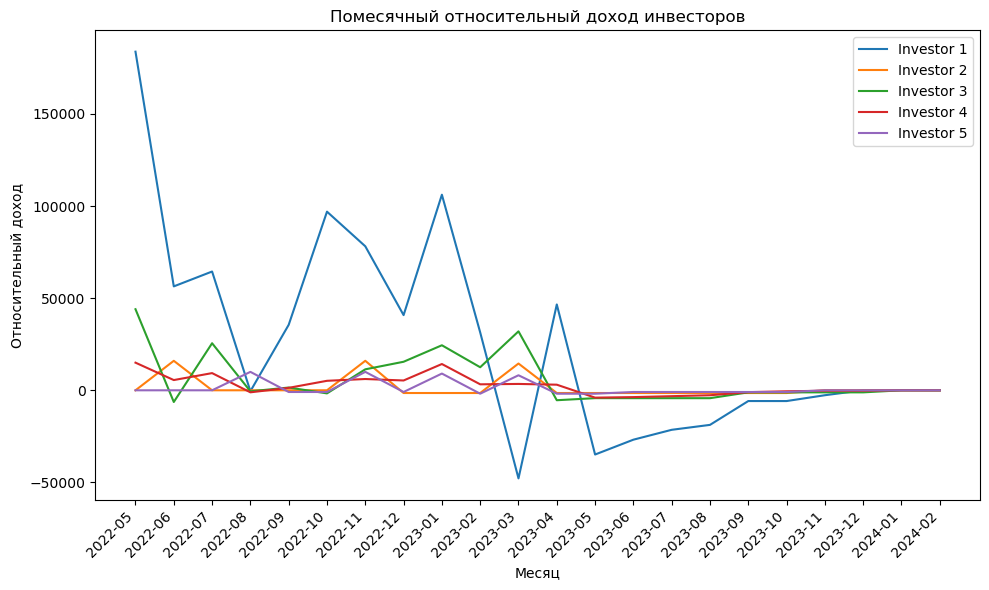

In [13]:
filtered_data = df[(df['date'] >= df['start_date']) & (df['date'] <= '2024-02-01')]

filtered_data['month'] = filtered_data['date'].dt.to_period('M')

filtered_data['relative_income'] = filtered_data.apply(
    lambda row: row['interest_payment'] / row['amount_x'] if row['status'] != 'default' else -row['amount_x'],
    axis=1
)

monthly_investor_relative_income = filtered_data.groupby(['investor_id', 'month'])['relative_income'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

for investor_id, data in monthly_investor_relative_income.groupby('investor_id'):
    ax.plot(data['month'].astype(str), data['relative_income'], label=f'Investor {investor_id}')

ax.set_xlabel('Месяц')
ax.set_ylabel('Относительный доход')
ax.legend()
plt.title('Помесячный относительный доход инвесторов')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**На основе данного графика можно сделать следующие выводы:**

1) Относительная доходность инвестора №1 менялась значительнее всего, возможно данный инвестор предпочитаем вкладывать инвестиции в нестандартные проекты с высоким уровнем риска, но также высокой потенциальной доходностью. (Агрессивный портфель).

2) Остальные инвесторы укладываются в некий средний профиль, возможно они более консервативны и предпочитают вложения в более стабильные и надежные активы. (Консервативный портфель).

3) В мае 2023 года произошло некое событие (отсуствие истории наблюдений, рыночная стабильность или низкая волатильность, неактивность или консервативные стратегии инвестирования).